In [1]:
from kipet.library.TemplateBuilder import *
from kipet.library.PyomoSimulator import *

import matplotlib.pyplot as plt
import sys

In [30]:
builder = TemplateBuilder()  
    
builder.add_mixture_component('A',1.0)
builder.add_mixture_component('B',2.0)
builder.add_mixture_component('C',0.0)
builder.add_mixture_component('D',0.0)
    
builder.add_parameter('k1',1.0)
builder.add_parameter('k2',2.0)
    
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']*m.Z[t,'B']
    exprs['B'] = -m.P['k1']*m.Z[t,'A']*m.Z[t,'B']-m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    exprs['C'] = m.P['k1']*m.Z[t,'A']*m.Z[t,'B']-m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    exprs['D'] = m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    return exprs

builder.set_odes_rule(rule_odes)

In [31]:
pyomo_model = builder.create_pyomo_model(0.0, 4.0)
simulator = PyomoSimulator(pyomo_model)

In [32]:
simulator.apply_discretization('dae.collocation', ncp = 2, nfe = 30, scheme = 'LAGRANGE-RADAU')
results_pyomo = simulator.run_sim('ipopt',tee=True)

Ipopt 3.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     1804
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      120

Total number of variables............................:      484
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      484
Total number of inequali

Text(0.5, 1.0, 'Concentration Profile')

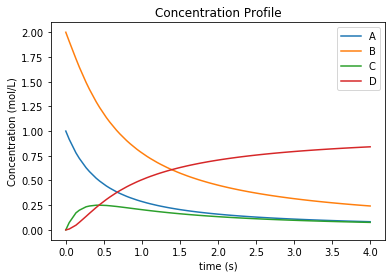

In [33]:
results_pyomo.Z.plot.line(legend=True)
plt.xlabel("time (s)")
plt.ylabel("Concentration (mol/L)")
plt.title("Concentration Profile")

In [36]:
data1 = results_pyomo.Z.copy()

In [37]:
data1 = data1.iloc[::5,:]
data1.shape

(13, 4)

In [38]:
data1['A'] = data1['A'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])
data1['B'] = data1['B'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])
data1['C'] = data1['C'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])
data1['D'] = data1['D'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])

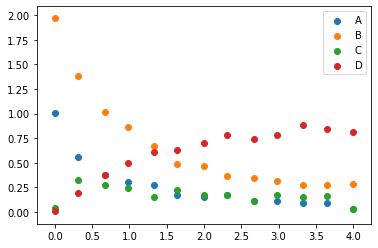

In [39]:
fig, ax = plt.subplots()
for x in ['A', 'B', 'C', 'D']:
    ax.scatter(data1.index, data1[x], label = x)
ax.legend()

In [41]:
data1.to_csv('../my_data_sets/ABCD_cb0_2.csv')

In [42]:
builder = TemplateBuilder()  
    
builder.add_mixture_component('A',1.0)
builder.add_mixture_component('B',1.0)
builder.add_mixture_component('C',0.0)
builder.add_mixture_component('D',0.0)
    
builder.add_parameter('k1',1.0)
builder.add_parameter('k2',2.0)
    
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']*m.Z[t,'B']
    exprs['B'] = -m.P['k1']*m.Z[t,'A']*m.Z[t,'B']-m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    exprs['C'] = m.P['k1']*m.Z[t,'A']*m.Z[t,'B']-m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    exprs['D'] = m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    return exprs

builder.set_odes_rule(rule_odes)

In [46]:
pyomo_model = builder.create_pyomo_model(0.0, 7.0)
simulator = PyomoSimulator(pyomo_model)

In [47]:
simulator.apply_discretization('dae.collocation', ncp = 2, nfe = 30, scheme = 'LAGRANGE-RADAU')
results_pyomo = simulator.run_sim('ipopt',tee=True)

Ipopt 3.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     1804
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      120

Total number of variables............................:      484
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      484
Total number of inequali

Text(0.5, 1.0, 'Concentration Profile')

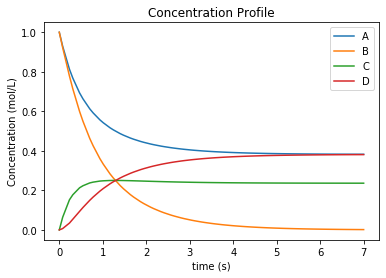

In [48]:
results_pyomo.Z.plot.line(legend=True)
plt.xlabel("time (s)")
plt.ylabel("Concentration (mol/L)")
plt.title("Concentration Profile")

In [49]:
data1 = results_pyomo.Z.copy()

In [50]:
data1 = data1.iloc[::5,:]
data1.shape
data1['A'] = data1['A'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])
data1['B'] = data1['B'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])
data1['C'] = data1['C'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])
data1['D'] = data1['D'] + 0.05 * np.random.normal(0, 1.0, data1.shape[0])

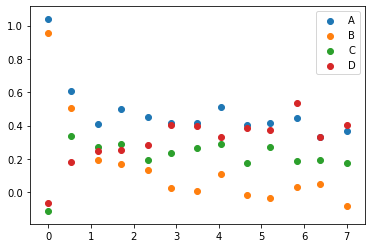

In [51]:
fig, ax = plt.subplots()
for x in ['A', 'B', 'C', 'D']:
    ax.scatter(data1.index, data1[x], label = x)
ax.legend()

In [52]:
data1.to_csv('../my_data_sets/ABCD_cb0_1.csv')